Look at how the heat fluxes on the ocean grid changed with the remapping changes from CanESM5.0 (conservative) to CanESM5.1 (conservative2).

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
%matplotlib inline
import xarray as xr
import numpy as np
import os
from pprint import pprint
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy 
from datetime import datetime
import cmocean
import pandas as pd
import intake
import xarray
import xesmf as xe
import cftime
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.geoaxes import GeoAxes

In [2]:
source_id=['CanESM5', 'CanESM5-1']
experiment_id=['piControl']
member_id=['r1i1p1f1', 'r1i1p2f1']

# This is the location of the intake database
cat_url = "/home/scrd106/model_output/intake-catalogues/cccma_cmip6.json"

In [3]:
col = intake.open_esm_datastore(cat_url)

query = dict(variable_id=['hfds', 'wmo'], table_id='Omon', source_id=source_id, experiment_id=experiment_id, 
             member_id=member_id)
cat = col.search(**query)

dset_dict = cat.to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [4]:
dset_dict.keys()

dict_keys(['CMIP.CCCma.CanESM5-1.piControl.Omon.gn', 'CMIP.CCCma.CanESM5.piControl.Omon.gn'])

In [5]:
dset_dict['CMIP.CCCma.CanESM5.piControl.Omon.gn'].sel(member_id='r1i1p2f1')

<xarray.Dataset>
Dimensions:             (time: 16800, j: 291, i: 360, dcpp_init_year: 1,
                         bnds: 2, vertices: 4, lev: 45)
Coordinates:
  * time                (time) object 5201-01-16 12:00:00 ... 6600-12-16 12:0...
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
  * dcpp_init_year      (dcpp_init_year) float64 nan
    member_id           <U8 'r1i1p2f1'
    time_bnds           (time, bnds) object dask.array<chunksize=(4320, 2), meta=np.ndarray>
    latitude            (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
  * lev                 (lev) float64 0.0 6.194 12.84 ... 5.25e+03 5.5e+03
    lev_bnds            (lev, bnds) float64 dask.array<chunksize=(45, 2), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    hfds                (dcpp_init_year, time, j, i) float32 dask.array<chunksize=(1, 300, 291, 360), meta=np.ndarray>
    wmo                 (dcpp_init_year, time, lev, j, i) float32 dask.array<chunksize=(1, 8, 45, 291, 360), meta=np.ndarray>
Attributes: (12/47)
    CCCma_model_hash:                 24718c8346665b218729640ffe79d263b76456c4
    CCCma_pycmor_hash:                33c30511acc319a98240633965a04ca99c26427e
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    Spin-up documentation
    contact:                          ec.cccma.info-info.ccmac.ec@canada.ca
    ...                               ...
    intake_esm_attrs:experiment_id:   piControl
    intake_esm_attrs:table_id:        Omon
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         v20190429
    intake_esm_attrs:_data_format_:   netcdf
    intake_esm_dataset_key:           CMIP.CCCma.CanESM5.piControl.Omon.gn

In [6]:
hfds_canesm50 =  dset_dict['CMIP.CCCma.CanESM5.piControl.Omon.gn'].sel(member_id='r1i1p2f1').isel(time=slice(10000,10121)).mean(dim='time').hfds.compute()
hfds_canesm51 =  dset_dict['CMIP.CCCma.CanESM5-1.piControl.Omon.gn'].sel(member_id='r1i1p1f1').isel(time=slice(1,121)).mean(dim='time').hfds.compute()

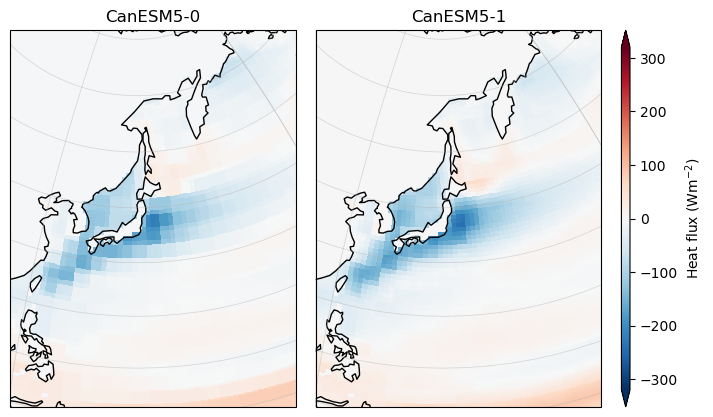

In [35]:
fig = plt.figure(figsize=(8,14))

projection=ccrs.LambertAzimuthalEqualArea(central_longitude=140, central_latitude=60)
axes_class = (GeoAxes,
                  dict(projection=projection))

obs_contours={'colors':'k', 'linewidths':1}
model_contours={'colors':'k', 'linewidths':1}
levels=np.arange(-300,320,20)
grid = AxesGrid(fig, 111, axes_class=axes_class,
                    nrows_ncols=(1, 2),
                    axes_pad=0.2,
                    cbar_location='right',
                    cbar_mode='edge',
                    cbar_pad=0.2,
                    cbar_size='3%',
                    label_mode='')  # note the empty label_modead=0.05
ax = grid[0]
ax.set_title('CanESM5-0')
ax.pcolormesh(hfds_canesm50.longitude, hfds_canesm50.latitude, 
               hfds_canesm50.squeeze(), vmin=-320, vmax=320, cmap='RdBu_r',
               transform=ccrs.PlateCarree())

ax = grid[1]
ax.set_title('CanESM5-1')
cb=ax.pcolormesh(hfds_canesm51.longitude, hfds_canesm51.latitude, 
               hfds_canesm51.squeeze(), vmin=-320, vmax=320, cmap='RdBu_r',
               transform=ccrs.PlateCarree())

for i, ax in enumerate(grid):
    ax.coastlines(resolution='110m')
    ax.gridlines(linewidth=0.5, alpha=0.5)
    ax.set_extent([120,165,2,70])
    
grid.cbar_axes[0].colorbar(cb,extend='both', label =r'Heat flux (Wm$^{-2}$)')
fig.savefig('hfds_canesm5-0_vs_5-1.png', bbox_inches='tight', dpi=300)

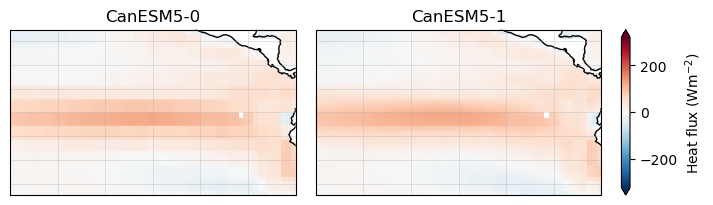

In [44]:
fig = plt.figure(figsize=(8,14))

projection=ccrs.Mercator(central_longitude=230)
axes_class = (GeoAxes,
                  dict(projection=projection))

obs_contours={'colors':'k', 'linewidths':1}
model_contours={'colors':'k', 'linewidths':1}
levels=np.arange(-300,320,20)
grid = AxesGrid(fig, 111, axes_class=axes_class,
                    nrows_ncols=(1, 2),
                    axes_pad=0.2,
                    cbar_location='right',
                    cbar_mode='edge',
                    cbar_pad=0.2,
                    cbar_size='3%',
                    label_mode='')  # note the empty label_modead=0.05
ax = grid[0]
ax.set_title('CanESM5-0')
ax.pcolormesh(hfds_canesm50.longitude, hfds_canesm50.latitude, 
               hfds_canesm50.squeeze(), vmin=-320, vmax=320, cmap='RdBu_r',
               transform=ccrs.PlateCarree())

ax = grid[1]
ax.set_title('CanESM5-1')
cb=ax.pcolormesh(hfds_canesm51.longitude, hfds_canesm51.latitude, 
               hfds_canesm51.squeeze(), vmin=-320, vmax=320, cmap='RdBu_r',
               transform=ccrs.PlateCarree())

for i, ax in enumerate(grid):
    ax.coastlines(resolution='110m')
    ax.gridlines(linewidth=0.5, alpha=0.5)
    ax.set_extent([220,280,-15,15])
    
grid.cbar_axes[0].colorbar(cb,extend='both', label =r'Heat flux (Wm$^{-2}$)')
fig.savefig('hfds_canesm5-0_vs_5-1_equator.png', bbox_inches='tight', dpi=300)

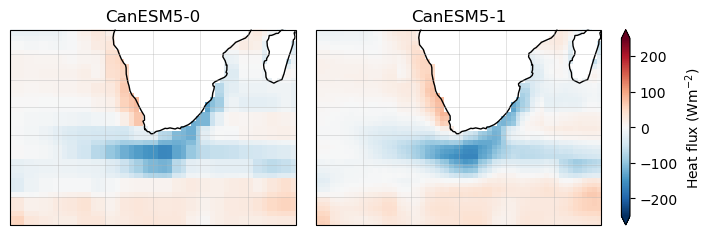

In [43]:
fig = plt.figure(figsize=(8,14))

projection=ccrs.Mercator(central_longitude=20)
axes_class = (GeoAxes,
                  dict(projection=projection))

obs_contours={'colors':'k', 'linewidths':1}
model_contours={'colors':'k', 'linewidths':1}
vmin=-250
vmax=250
grid = AxesGrid(fig, 111, axes_class=axes_class,
                    nrows_ncols=(1, 2),
                    axes_pad=0.2,
                    cbar_location='right',
                    cbar_mode='edge',
                    cbar_pad=0.2,
                    cbar_size='3%',
                    label_mode='')  # note the empty label_modead=0.05
ax = grid[0]
ax.set_title('CanESM5-0')
ax.pcolormesh(hfds_canesm50.longitude, hfds_canesm50.latitude, 
               hfds_canesm50.squeeze(), vmin=vmin, vmax=vmax, cmap='RdBu_r',
               transform=ccrs.PlateCarree())

ax = grid[1]
ax.set_title('CanESM5-1')
cb=ax.pcolormesh(hfds_canesm51.longitude, hfds_canesm51.latitude, 
               hfds_canesm51.squeeze(), vmin=vmin, vmax=vmax, cmap='RdBu_r',
               transform=ccrs.PlateCarree())

for i, ax in enumerate(grid):
    ax.coastlines(resolution='110m')
    ax.gridlines(linewidth=0.5, alpha=0.5)
    ax.set_extent([-10,50,-45,-15])
    
grid.cbar_axes[0].colorbar(cb,extend='both', label =r'Heat flux (Wm$^{-2}$)')
fig.savefig('hfds_canesm5-0_vs_5-1_agulhas.png', bbox_inches='tight', dpi=300)

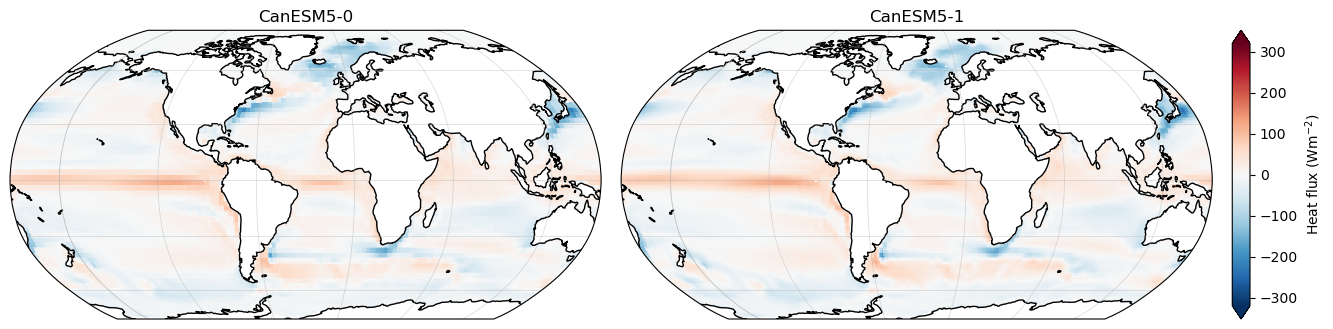

In [12]:
fig = plt.figure(figsize=(16,16))

projection=ccrs.Robinson(central_longitude=330)
axes_class = (GeoAxes,
                  dict(projection=projection))

obs_contours={'colors':'k', 'linewidths':1}
model_contours={'colors':'k', 'linewidths':1}
levels=np.arange(-300,320,20)
grid = AxesGrid(fig, 111, axes_class=axes_class,
                    nrows_ncols=(1, 2),
                    axes_pad=0.2,
                    cbar_location='right',
                    cbar_mode='edge',
                    cbar_pad=0.2,
                    cbar_size='3%',
                    label_mode='')  # note the empty label_modead=0.05
ax = grid[0]
ax.set_title('CanESM5-0')
ax.pcolormesh(hfds_canesm50.longitude, hfds_canesm50.latitude, 
               hfds_canesm50.squeeze(), vmin=-320, vmax=320, cmap='RdBu_r',
               transform=ccrs.PlateCarree())

ax = grid[1]
ax.set_title('CanESM5-1')
cb=ax.pcolormesh(hfds_canesm51.longitude, hfds_canesm51.latitude, 
               hfds_canesm51.squeeze(), vmin=-320, vmax=320, cmap='RdBu_r',
               transform=ccrs.PlateCarree())

for i, ax in enumerate(grid):
    ax.coastlines(resolution='110m')
    ax.gridlines(linewidth=0.5, alpha=0.5)
    #ax.set_extent([220,280,-15,15])
    
grid.cbar_axes[0].colorbar(cb,extend='both', label =r'Heat flux (Wm$^{-2}$)')
fig.savefig('hfds_canesm5-0_vs_5-1_global.png', bbox_inches='tight', dpi=300)

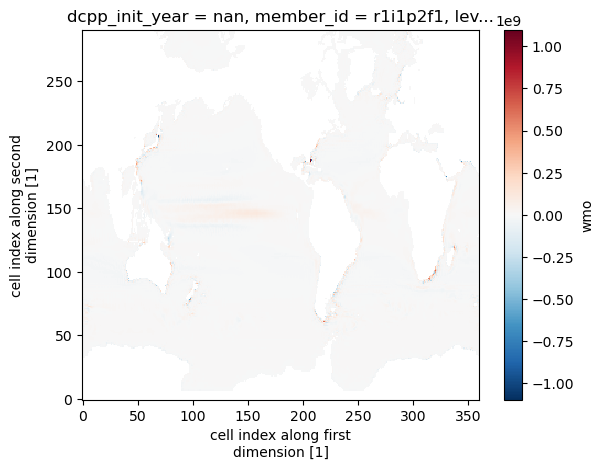

In [16]:
dset_dict['CMIP.CCCma.CanESM5.piControl.Omon.gn'].sel(member_id='r1i1p2f1').isel(time=slice(10000,10121)).mean(dim='time').wmo.isel(lev=10).plot()

In [22]:
query = dict(variable_id=['wmo'], table_id='Omon', source_id=source_id, experiment_id=experiment_id, 
             member_id=member_id)
cat = col.search(**query)

In [29]:
wmo_50 = dset_dict['CMIP.CCCma.CanESM5.piControl.Omon.gn'].sel(member_id='r1i1p2f1').isel(time=slice(10000,10121)).mean(dim='time').wmo
wmo_51 = xr.open_dataset('/home/scrd106/model_output/canesm-5.1/CanESM5-v510b-pict/piControl/r1i1p1f1/Omon/wmo/gn/v20190429/wmo_Omon_CanESM5-v510b-pict_piControl_r1i1p1f1_gn_600001-601012.nc').wmo.mean(dim='time')

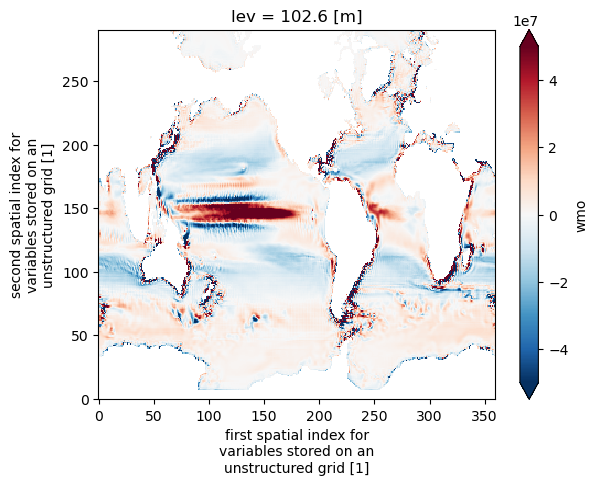

In [37]:
(wmo_51.isel(lev=10)).plot(vmin=-0.5e8, vmax=0.5e8, cmap='RdBu_r')

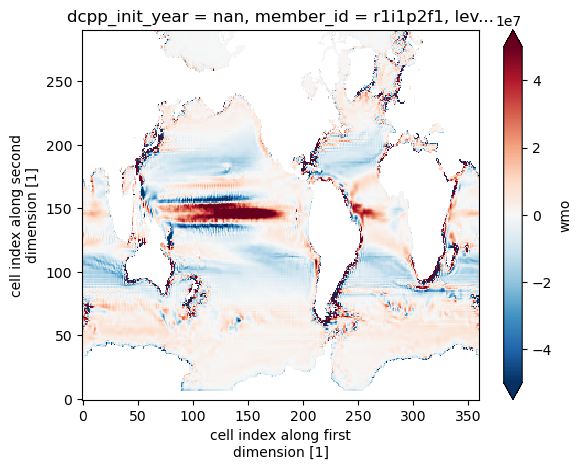

In [38]:
(wmo_50.isel(lev=10)).plot(vmin=-0.5e8, vmax=0.5e8, cmap='RdBu_r')